In [38]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras.models import load_model

import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [39]:
# Load the dataset
train = pd.read_csv('data_set/emnist-letters-train.csv')
test = pd.read_csv('data_set/emnist-letters-test.csv')

# Reshape the dataset and preprocess
def preprocess_data(data):
    images = data.iloc[:, 1:].values.astype('float32')
    images = np.apply_along_axis(rotate, 1, images)
    images = images.reshape(images.shape[0], 28, 28, 1)
    print(images[0].shape)
    labels = data.iloc[:, 0].values.astype('int32') - 1  # zero indexing
    return images, labels

def rotate(image):
    image = image.reshape(28, 28)
    return np.fliplr(np.rot90(image, 3)).reshape(784)

image_train, label_train = preprocess_data(train)
image_test, label_test = preprocess_data(test)

# Image Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.10,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(image_train)


(28, 28, 1)
(28, 28, 1)


In [43]:
model = load_model('lstm_epochs_512_.h5')

In [44]:
# Convert number to text a = 1 ... z = 26
def number_to_text(n):
    if 1 <= n <= 26:
        return chr(96 + n) 
    else:
        raise ValueError("The number should be between 1 and 26.")

In [45]:
loss, accuracy = model.evaluate(image_test, label_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

463/463 [==============================] - 8s 13ms/step - loss: 0.2179 - accuracy: 0.9260
Loss: 0.21789544820785522, Accuracy: 0.9260085225105286


(14799, 28, 28, 1)
463/463 [==============================] - 9s 17ms/step


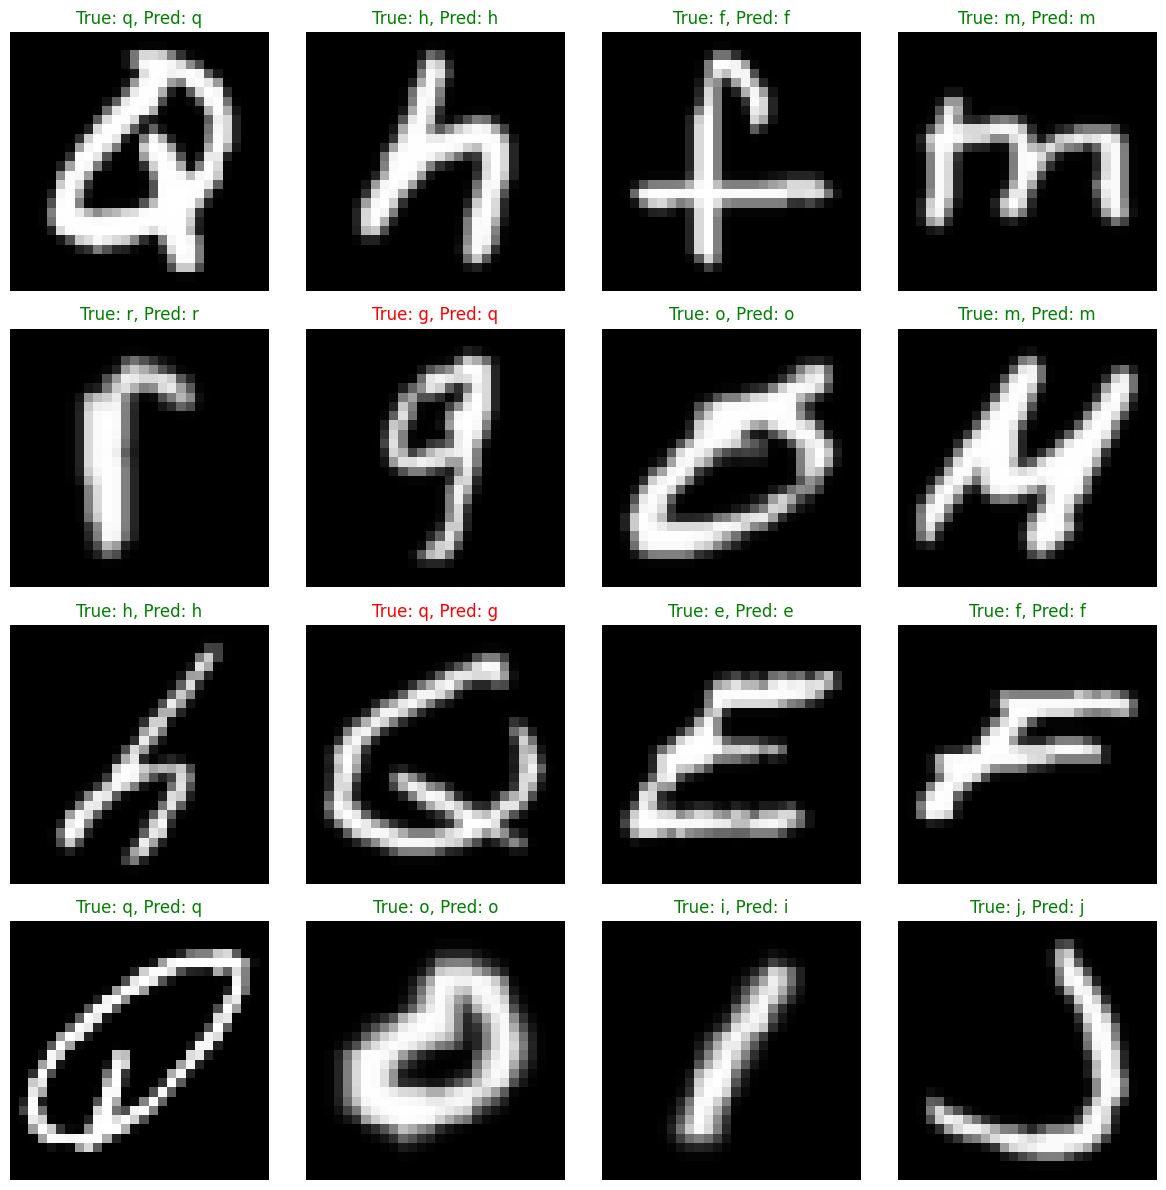

In [46]:
from random import randint

print(image_test.shape)

# Predict
predictions = model.predict(image_test)
max_predictions = len(predictions)

# Visualize predictions
def plot_sample(X, y_true, y_pred, index, ax):
    ax.imshow(X[index].reshape(28, 28), cmap='gray')
    true_label = chr(y_true[index] + 97)  # Convert to ascii and then to char
    pred_label = chr(np.argmax(y_pred[index]) + 97)
    if true_label == pred_label:
        color = 'green'
    else:
        color = 'red'
    ax.set_title(f"True: {true_label}, Pred: {pred_label}", color=color)
    ax.axis('off')

fig, axes = plt.subplots(4, 4, figsize=(12, 12))
axes = axes.ravel()

for i in range(16):
    plot_sample(image_test, label_test, predictions, randint(1,max_predictions), axes[i])
    
plt.tight_layout()
plt.show()


In [47]:
import os
from random import randint

def save_test_images(X_test, save_dir, num_images=10):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    max = len(X_test)
    for i in range(num_images):
        index = randint(1,max)
        plt.figure(figsize=(2,2))
        plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
        plt.axis('off')
        file_path = os.path.join(save_dir, f"test_image_{index}.png")
        plt.savefig(file_path, bbox_inches='tight', pad_inches=0)
        plt.close()

# Usage:
save_dir = "saved_test_images"
save_test_images(image_test, save_dir, num_images=10)


1/1 [==============================] - 1s 745ms/step
Image: az5/k.png
  1. k (1.00)
  2. x (0.00)
  3. h (0.00)


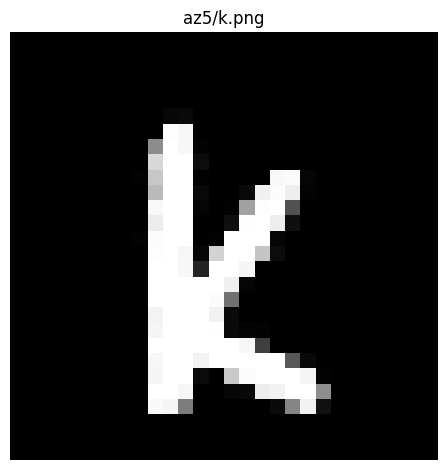

Predicted Character for k.png: k

------------------------------------------------------------
1/1 [==============================] - 0s 21ms/step
Image: az5/j.png
  1. j (0.99)
  2. i (0.01)
  3. t (0.00)


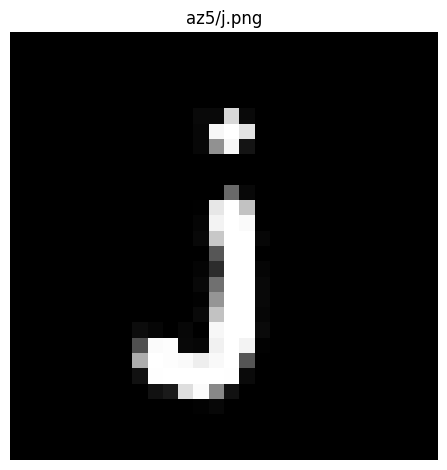

Predicted Character for j.png: j

------------------------------------------------------------
1/1 [==============================] - 0s 24ms/step
Image: az5/h.png
  1. h (0.99)
  2. n (0.01)
  3. k (0.00)


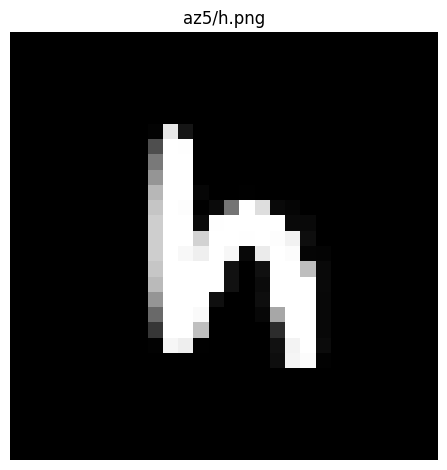

Predicted Character for h.png: h

------------------------------------------------------------
1/1 [==============================] - 0s 20ms/step
Image: az5/i.png
  1. i (0.87)
  2. j (0.11)
  3. t (0.00)


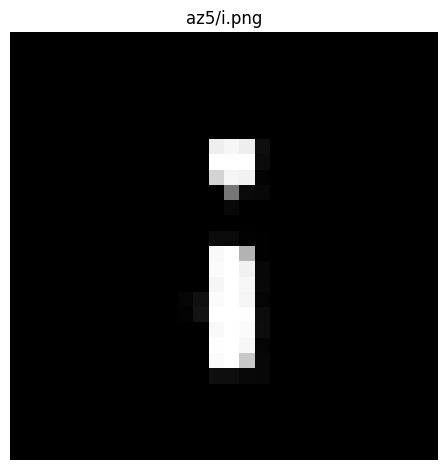

Predicted Character for i.png: i

------------------------------------------------------------
1/1 [==============================] - 0s 18ms/step
Image: az5/z.png
  1. z (1.00)
  2. e (0.00)
  3. t (0.00)


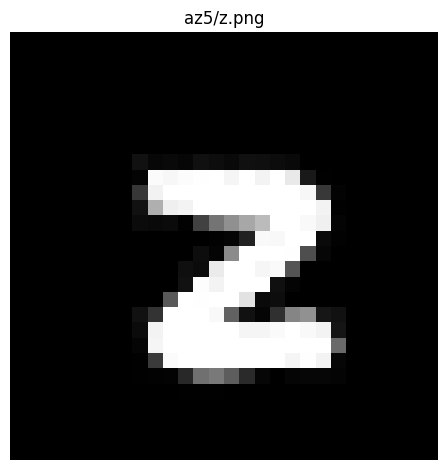

Predicted Character for z.png: z

------------------------------------------------------------
1/1 [==============================] - 0s 21ms/step
Image: az5/m.png
  1. m (0.96)
  2. n (0.03)
  3. x (0.00)


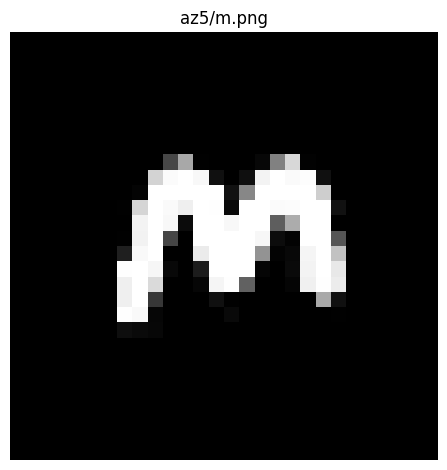

Predicted Character for m.png: m

------------------------------------------------------------
1/1 [==============================] - 0s 19ms/step
Image: az5/l.png
  1. l (0.97)
  2. i (0.01)
  3. c (0.01)


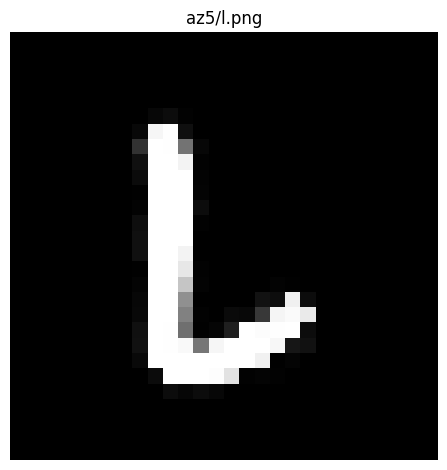

Predicted Character for l.png: l

------------------------------------------------------------
1/1 [==============================] - 0s 21ms/step
Image: az5/y.png
  1. y (1.00)
  2. g (0.00)
  3. j (0.00)


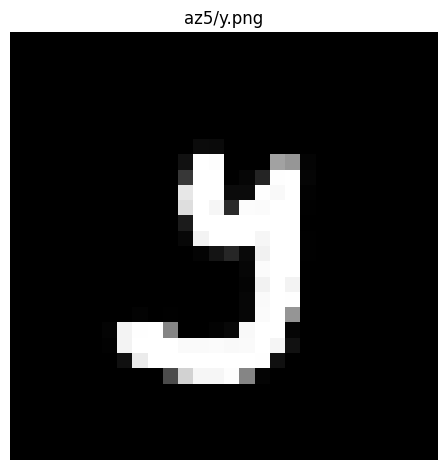

Predicted Character for y.png: y

------------------------------------------------------------
1/1 [==============================] - 0s 23ms/step
Image: az5/n.png
  1. n (0.87)
  2. h (0.12)
  3. w (0.00)


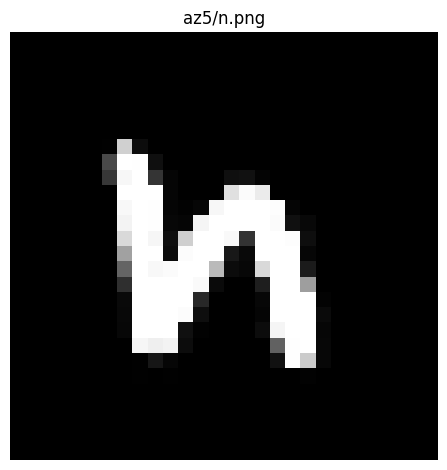

Predicted Character for n.png: n

------------------------------------------------------------
1/1 [==============================] - 0s 21ms/step
Image: az5/o.png
  1. o (0.98)
  2. g (0.01)
  3. d (0.00)


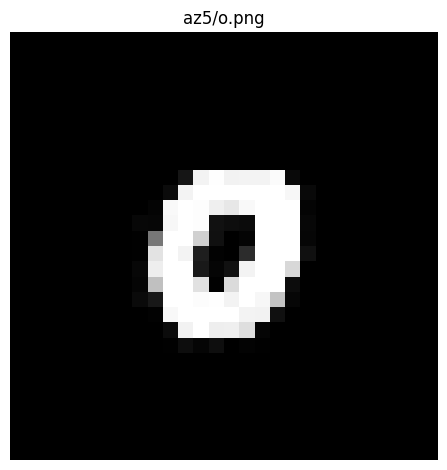

Predicted Character for o.png: o

------------------------------------------------------------
1/1 [==============================] - 0s 18ms/step
Image: az5/x.png
  1. x (1.00)
  2. k (0.00)
  3. y (0.00)


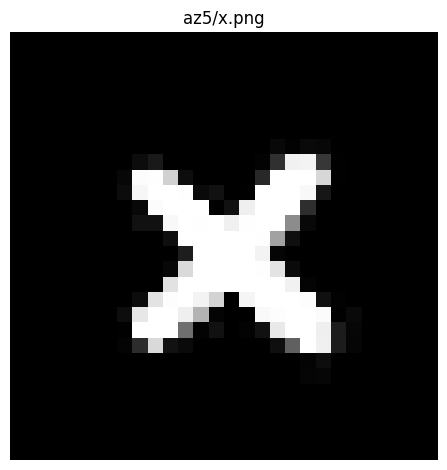

Predicted Character for x.png: x

------------------------------------------------------------
1/1 [==============================] - 0s 18ms/step
Image: az5/u.png
  1. u (0.84)
  2. v (0.13)
  3. c (0.01)


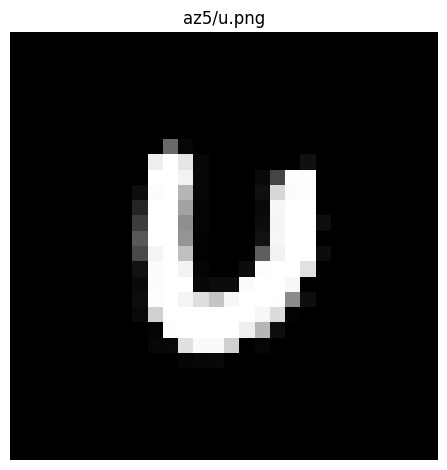

Predicted Character for u.png: u

------------------------------------------------------------
1/1 [==============================] - 0s 19ms/step
Image: az5/b.png
  1. b (0.95)
  2. h (0.02)
  3. l (0.01)


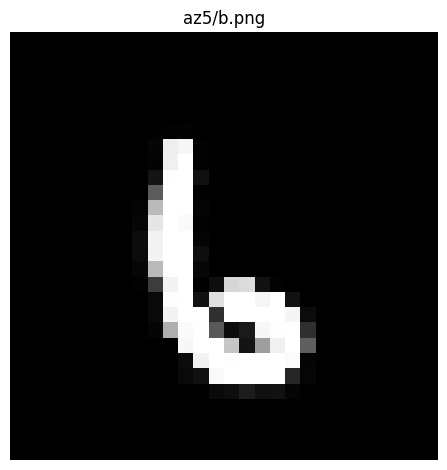

Predicted Character for b.png: b

------------------------------------------------------------
1/1 [==============================] - 0s 21ms/step
Image: az5/c.png
  1. c (0.96)
  2. e (0.03)
  3. t (0.00)


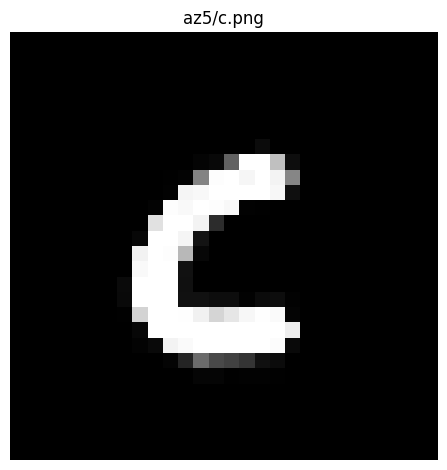

Predicted Character for c.png: c

------------------------------------------------------------
1/1 [==============================] - 0s 19ms/step
Image: az5/t.png
  1. t (1.00)
  2. e (0.00)
  3. k (0.00)


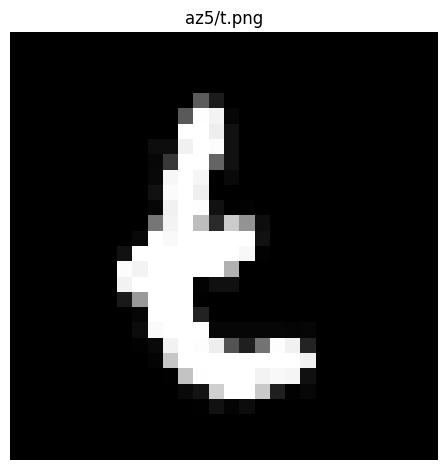

Predicted Character for t.png: t

------------------------------------------------------------
1/1 [==============================] - 0s 20ms/step
Image: az5/v.png
  1. v (0.88)
  2. u (0.08)
  3. c (0.01)


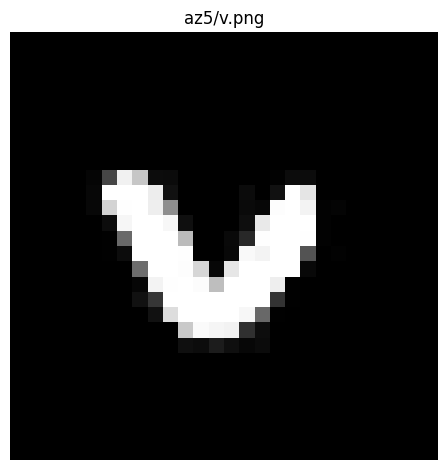

Predicted Character for v.png: v

------------------------------------------------------------
1/1 [==============================] - 0s 21ms/step
Image: az5/a.png
  1. d (0.93)
  2. a (0.06)
  3. q (0.00)


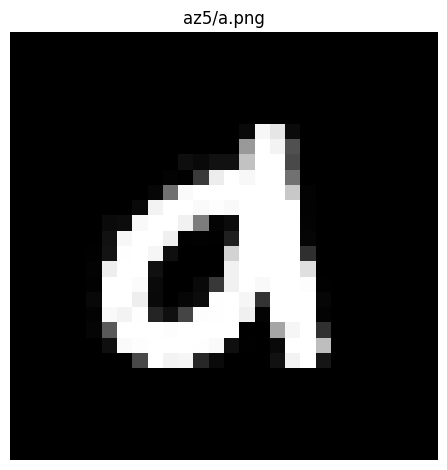

Predicted Character for a.png: d

------------------------------------------------------------
1/1 [==============================] - 0s 21ms/step
Image: az5/w.png
  1. w (0.99)
  2. u (0.01)
  3. m (0.00)


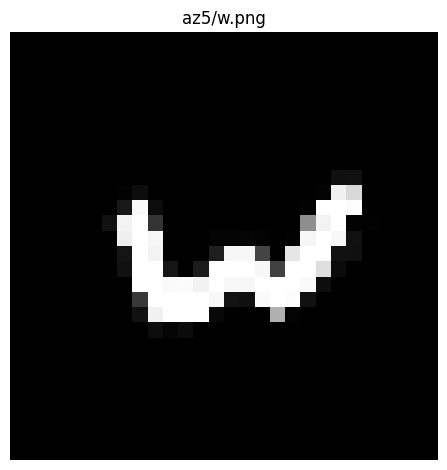

Predicted Character for w.png: w

------------------------------------------------------------
1/1 [==============================] - 0s 24ms/step
Image: az5/d.png
  1. d (0.99)
  2. b (0.00)
  3. o (0.00)


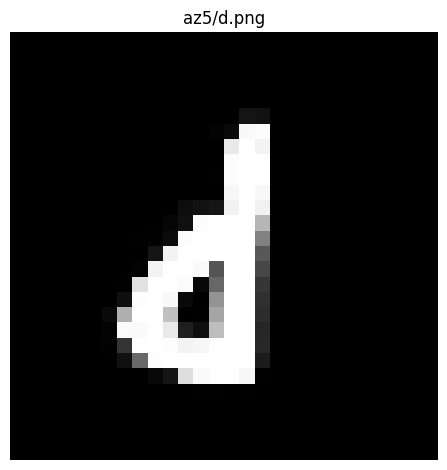

Predicted Character for d.png: d

------------------------------------------------------------
1/1 [==============================] - 0s 22ms/step
Image: az5/s.png
  1. s (1.00)
  2. j (0.00)
  3. i (0.00)


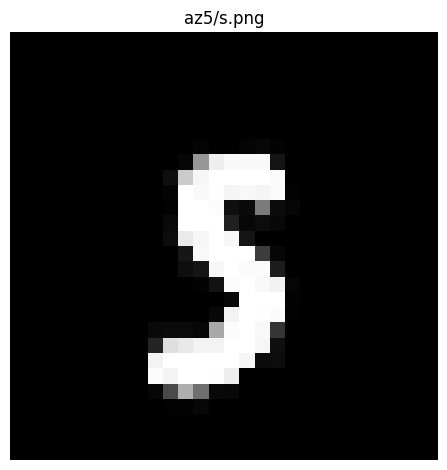

Predicted Character for s.png: s

------------------------------------------------------------
1/1 [==============================] - 0s 22ms/step
Image: az5/r.png
  1. r (0.96)
  2. t (0.02)
  3. c (0.01)


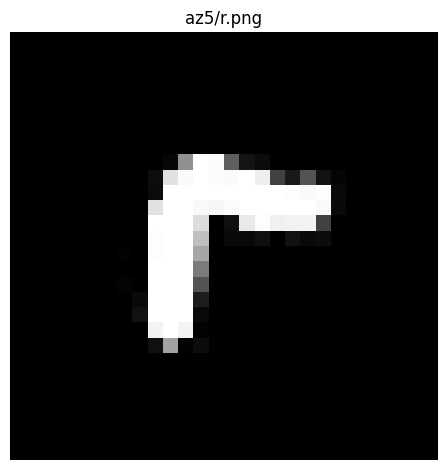

Predicted Character for r.png: r

------------------------------------------------------------
1/1 [==============================] - 0s 46ms/step
Image: az5/e.png
  1. e (1.00)
  2. p (0.00)
  3. r (0.00)


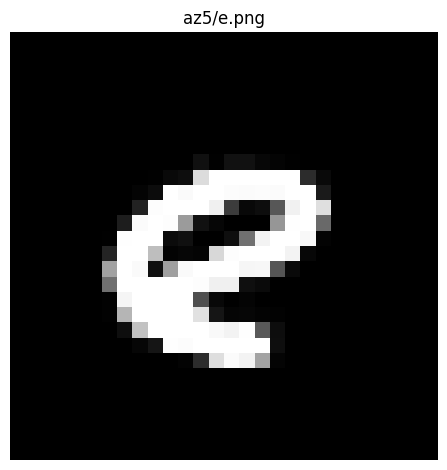

Predicted Character for e.png: e

------------------------------------------------------------
1/1 [==============================] - 0s 23ms/step
Image: az5/g.png
  1. g (0.67)
  2. o (0.32)
  3. q (0.01)


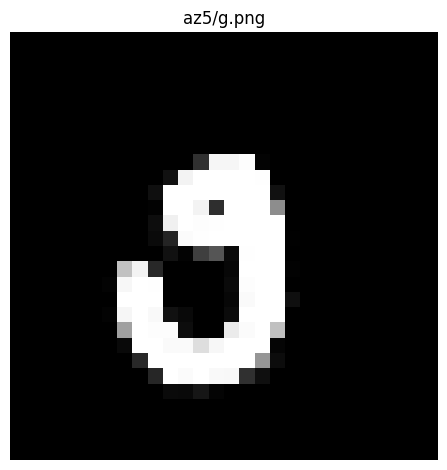

Predicted Character for g.png: g

------------------------------------------------------------
1/1 [==============================] - 0s 32ms/step
Image: az5/p.png
  1. p (0.93)
  2. q (0.03)
  3. l (0.01)


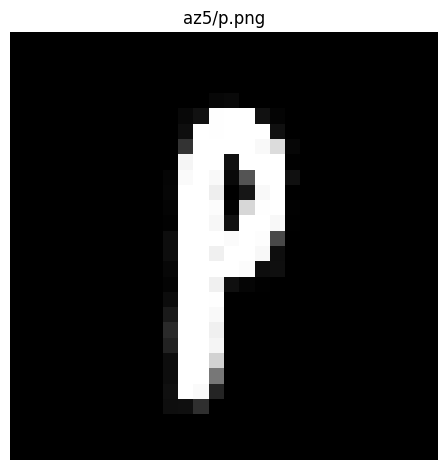

Predicted Character for p.png: p

------------------------------------------------------------
1/1 [==============================] - 0s 21ms/step
Image: az5/q.png
  1. q (0.84)
  2. g (0.16)
  3. a (0.00)


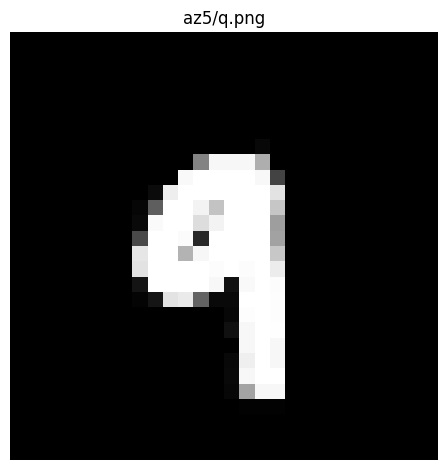

Predicted Character for q.png: q

------------------------------------------------------------
1/1 [==============================] - 0s 35ms/step
Image: az5/f.png
  1. f (1.00)
  2. d (0.00)
  3. t (0.00)


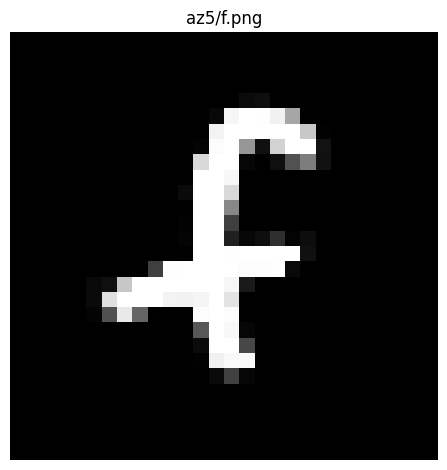

Predicted Character for f.png: f

------------------------------------------------------------


In [48]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

def predict_from_image(file_path, model):
    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    
    # Resize and preprocess the image
    img = cv2.resize(img, (28, 28))
    # Invert color
    img = 255 - img
    # Reshape image
    img = img.reshape(28, 28, 1)
    img = img[np.newaxis,...]

    # Predict
    prediction = model.predict(img)
    predicted_char = chr(np.argmax(prediction) + 97)
    
    # Get top 3 predictions
    top3_indices = prediction[0].argsort()[-3:][::-1]
    top3_probs = prediction[0][top3_indices]
    top3_chars = [chr(i + 97) for i in top3_indices]
    
    plt.imshow(img.reshape(28, 28), cmap='gray')
    
    print(f"Image: {file_path}")
    for index in range(3):  # Displaying only top 3 predictions
        print(f"  {index + 1}. {top3_chars[index]} ({top3_probs[index]:.2f})")
    
    plt.title(file_path)
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

    return predicted_char

directory_path = 'az5'

# Iterate over all files in the directory
for filename in os.listdir(directory_path):
    # if filename.endswith('.png'):
    file_path = os.path.join(directory_path, filename)
    predicted_char = predict_from_image(file_path, model)
    print(f"Predicted Character for {filename}: {predicted_char}\n")
    print("-"*60)
